## **Bivariate Analysis: Analyst vs. Risk**

#### **Context**
In this notebook, we will analyze the relationship between **loan analysts** and **credit risk** in the microcredit portfolio of Bank W. The objective is to determine whether certain analysts have a higher tendency to approve high-risk loans, which could impact the bank's overall risk exposure.

#### **Objective**
- Identify patterns in **loan risk levels by analyst**.
- Evaluate whether certain analysts systematically approve riskier loans.
- Provide insights that may help **optimize risk assessment and decision-making processes**.

#### **Analysis Approach**
1. **Data Loading & Exploration**: Load and inspect the dataset to understand its structure.
2. **Descriptive Statistics**: Summarize key statistics for analysts and risk levels.
3. **Data Visualization**:
   - **Bar charts** to compare average risk levels per analyst.
   - **Boxplots** to visualize risk distribution across analysts.
   - **Contingency tables & Chi-square test** to determine statistical relationships.
4. **Interpretation & Conclusions**: Identify key findings and actionable insights.


In [ ]:
#Load packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, spearmanr
from statsmodels.stats.proportion import proportions_ztest

In [18]:
#Load data

df = pd.read_excel("G:\\Mi unidad\\Maestría Inteligencia Artificial Aplicada\\1. Primer semestre\\1. Análisis de datos I\\Reto Banco W\\Analitica_1\\Data\\output_data\\hallazgos_clean.xlsx")
df.head(20)



,Unnamed: 0,cliente,analista,tipo_credito,actividad,actividad_v2,monto,cuota,plazo,oficina,...,relaciones_laborales,estado,year,tipo,categoria,hallazgo,tipo_hallazgo,riesgo,riesgo_int,riesgo_bin
0,0,Hector Julio Pabon Castano,AIZ,Renovacion,don_patacon_postobon,otros_servicios_y_negocios,15069268,792642,36,dosquebradas,...,Si,cancelada,2022,afecta estabilidad,fraude_y_practicas_indebidas,credito otorgado a mas de un titular con el mi...,acto irregular,1 - Alto,1,1
1,1,Casas Marisol ...,JQQ,Renovacion,expendio_de_comidas_preparadas_en_cafeterias,sector_alimenticio,402000,209228,626,poblado,...,Si,castigo,2022,afecta estabilidad,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,1 - Alto,1,1
2,2,Jennifer Lopez Perez,IOC,Nuevo,drogueria,salud_y_afines,19213296,991582,42,dosquebradas,...,Si,modificado,2022,afecta estabilidad,fraude_y_practicas_indebidas,negocio no es del solicitante,acto irregular,1 - Alto,1,1
3,3,Laura Marcela Valdes Zapata,CZL,Renovacion,manualidades_artes_plasticas,oficios_tecnicos_y_manuales,1055378,205648,6,tulua,...,no_especificado,cancelada,2022,afecta estabilidad,fraude_y_practicas_indebidas,credito otorgado a mas de un titular con el mi...,acto irregular,1 - Alto,1,1
4,4,Martha Cecilia Veru,AQT,Preferencial,venta_de_mercancia,comercio_y_ventas_general,2481136,170529,24,independencia,...,Si,normal,2022,afecta estabilidad,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,1 - Alto,1,1
5,5,Alba Nory Ospina Quintero,EQJ,Preferencial,mercancia,comercio_y_ventas_general,30933408,1358673,42,dosquebradas,...,Si,normal,2022,afecta estabilidad,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,1 - Alto,1,1
6,6,Carmelita Arias De Diaz,IKO,Preferencial,venta_de_catalogos,comercio_y_ventas_general,2100000,167706,24,dosquebradas,...,Si,cancelada,2022,afecta estabilidad,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,1 - Alto,1,1
7,7,Liana Shirley Zapata Maya,CZL,Renovacion,clases_de_pintura_manualidades,oficios_tecnicos_y_manuales,400000,84084,8,tulua,...,no_especificado,cancelada,2022,afecta estabilidad,fraude_y_practicas_indebidas,credito otorgado a mas de un titular con el mi...,acto irregular,1 - Alto,1,1
8,8,Angela Patricia Pabon Castano,IKO,Renovacion,don_patacon,otros_servicios_y_negocios,31031562,1228002,42,dosquebradas,...,Si,normal,2022,afecta estabilidad,fraude_y_practicas_indebidas,credito otorgado a mas de un titular con el mi...,acto irregular,1 - Alto,1,1
9,9,Flor Alba Nunez Tagua,MAP,Renovacion,manualidades,oficios_tecnicos_y_manuales,3308000,431000,15,independencia,...,Si,cancelada,2022,afecta estabilidad,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,1 - Alto,1,1


In [27]:
# Revisión de los datos

# Verificar si hay valores nulos en las columnas de interés
print(df[['analista', 'riesgo_int']].isnull().sum())

# Contar cuántos analistas distintos hay en la base de datos
print(f"Número de analistas distintos: {df['analista'].nunique()}")

# Ver la distribución de los niveles de riesgo
print(df['riesgo_int'].value_counts())



analista      0
riesgo_int    0
dtype: int64
Número de analistas distintos: 386
riesgo_int
4    1084
2    1084
3     423
1     325
Name: count, dtype: int64


In [ ]:
# Convertir "analista" a valores numéricos con "label encoding"
df['analista_encoded'] = df['analista'].astype('category').cat.codes

# Calcular la correlación entre el código del analista y el riesgo
correlacion = df['analista_encoded'].corr(df['riesgo_int'])
print(f"Coeficiente de correlación Analista-Riesgo: {correlacion}")


Coeficiente de correlación Analista-Riesgo: -0.006673238432975704


### ¿El riesgo depende del analista?

##### ¿Existen analistas que consistentemente aprueban más créditos de riesgo alto que los demás?

In [34]:
# Crear una tabla de contingencia de analistas vs. niveles de riesgo
tabla_riesgo_por_analista = pd.crosstab(df['analista'], df['riesgo_int'])

# Mostrar la tabla generada
print(tabla_riesgo_por_analista)


riesgo_int  1  2  3   4
analista               
ACX         0  4  4   1
ADR         0  0  0   7
AIL         0  0  1  10
AIZ         2  0  0   1
AJI         0  1  0   1
...        .. .. ..  ..
SON         0  1  0  14
WBZ         0  4  0   0
YMG         2  1  1   7
YPN         2  2  0  16
ZUL         0  0  5   2

[386 rows x 4 columns]


In [35]:
# Crear una nueva columna en la tabla con la suma de los otros niveles de riesgo (2, 3, 4)
tabla_riesgo_por_analista['Total_Otros_Riesgos'] = tabla_riesgo_por_analista[2] + tabla_riesgo_por_analista[3] + tabla_riesgo_por_analista[4]

# Filtrar los analistas que aprueban más créditos de riesgo alto (1) que los otros niveles combinados
analistas_riesgo_alto = tabla_riesgo_por_analista[tabla_riesgo_por_analista[1] > tabla_riesgo_por_analista['Total_Otros_Riesgos']]

# Mostrar los analistas que cumplen la condición
print("Analistas que aprueban más créditos de riesgo alto que la suma de los demás niveles:")
print(analistas_riesgo_alto)


Analistas que aprueban más créditos de riesgo alto que la suma de los demás niveles:
riesgo_int   1  2  3  4  Total_Otros_Riesgos
analista                                    
AIZ          2  0  0  1                    1
CJN          6  2  0  3                    5
EDN          2  0  0  0                    0
FFW          4  0  0  0                    0
FYJ          1  0  0  0                    0
IQB          2  1  0  0                    1
ISV          3  0  0  2                    2
ISY          3  0  0  1                    1
IZS          1  0  0  0                    0
JKR         13  0  0  7                    7
KLR          2  0  0  0                    0
KVN          8  1  0  2                    3
LQL          2  0  0  1                    1
LRG          3  0  0  2                    2
MFQ          6  0  0  1                    1


<Figure size 1200x600 with 0 Axes>

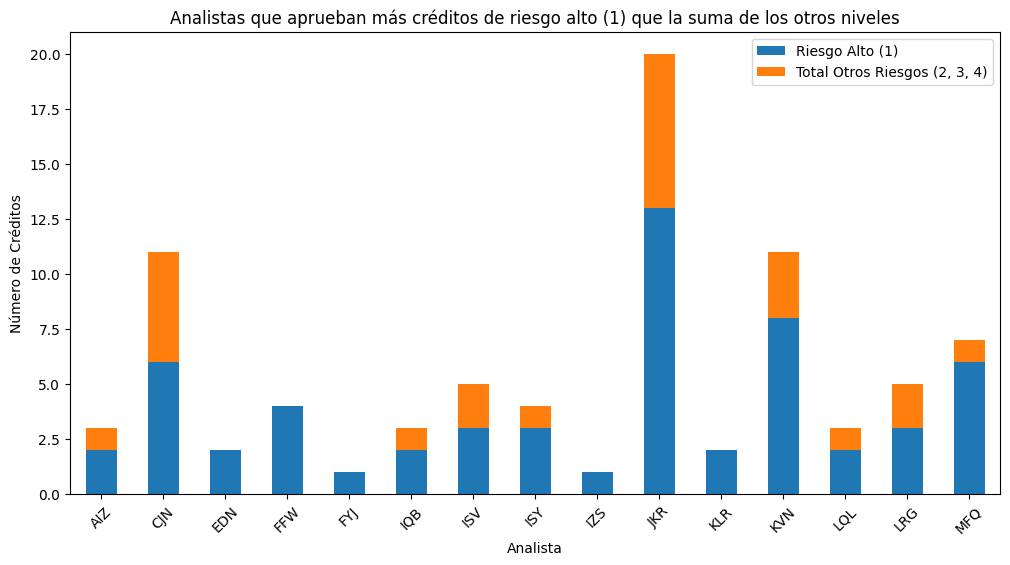

In [36]:
# Gráfico de los analistas que aprueban más créditos de riesgo alto
plt.figure(figsize=(12,6))
analistas_riesgo_alto[[1, 'Total_Otros_Riesgos']].plot(kind='bar', figsize=(12,6), stacked=True)
plt.xlabel("Analista")
plt.ylabel("Número de Créditos")
plt.title("Analistas que aprueban más créditos de riesgo alto (1) que la suma de los otros niveles")
plt.legend(["Riesgo Alto (1)", "Total Otros Riesgos (2, 3, 4)"])
plt.xticks(rotation=45)
plt.show()


##### Al tener tantos analistas, agrupamos analistas con tasas de incumplimiento similares 

In [ ]:
# Clasificamos los estados de los créditos
 
# Definir la clasificación de estados
estado_clasificacion = {
    'cancelada': 'bueno',
    'normal': 'bueno',
    'castigo': 'malo',
    'cobro judicial': 'malo',
    'modificado': 'indeterminado',
    'reestructurado': 'indeterminado',
    'no_especificado': 'indeterminado'
}

# Crear una nueva columna con la clasificación
df['estado_categoria'] = df['estado'].map(estado_clasificacion)

# Verificar la distribución de la nueva clasificación
print(df['estado_categoria'].value_counts())


estado_categoria
bueno            2004
indeterminado     704
malo              208
Name: count, dtype: int64


In [ ]:
# Calculamos la tasa de incumplimiento por analista

# Contar el total de créditos aprobados por cada analista
total_creditos = df.groupby('analista').size()

# Contar cuántos créditos de cada analista fueron "malos" (castigo o cobro judicial)
creditos_malos = df[df['estado_categoria'] == 'malo'].groupby('analista').size()

# Calcular la tasa de incumplimiento (si el analista no tiene créditos malos, se pone 0)
tasa_incumplimiento = (creditos_malos / total_creditos).fillna(0)

# Convertir en DataFrame para visualizar mejor
df_tasa_incumplimiento = tasa_incumplimiento.reset_index()
df_tasa_incumplimiento.columns = ['analista', 'tasa_incumplimiento']

# Ver los analistas con mayor tasa de incumplimiento
df_tasa_incumplimiento.sort_values(by='tasa_incumplimiento', ascending=False).head(10)


,analista,tasa_incumplimiento
99,EUK,1.000000
145,GXI,1.000000
283,KDK,0.666667
44,CRA,0.500000
256,JSZ,0.500000
279,KBT,0.500000
268,JXQ,0.500000
270,JYL,0.500000
296,KLR,0.500000
90,EDN,0.500000


In [ ]:
# Agrupamos analistas en niveles de riesgo

# Definir umbrales para clasificar los analistas según su tasa de incumplimiento
def clasificar_analista(tasa):
    if tasa >= 0.3:  # Más del 30% de sus créditos son "malos"
        return 'Alto riesgo'
    elif tasa >= 0.1:  # Entre 10% y 30% de sus créditos son "malos"
        return 'Riesgo medio'
    else:  # Menos del 10% de sus créditos son "malos"
        return 'Bajo riesgo'

# Aplicar la clasificación
df_tasa_incumplimiento['categoria_riesgo'] = df_tasa_incumplimiento['tasa_incumplimiento'].apply(clasificar_analista)

# Ver distribución de los analistas en cada categoría
print(df_tasa_incumplimiento['categoria_riesgo'].value_counts())


categoria_riesgo
Bajo riesgo     311
Riesgo medio     51
Alto riesgo      24
Name: count, dtype: int64


C:\Users\josue\AppData\Local\Temp\ipykernel_10352\2329187056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_tasa_incumplimiento, x='categoria_riesgo', palette='coolwarm')


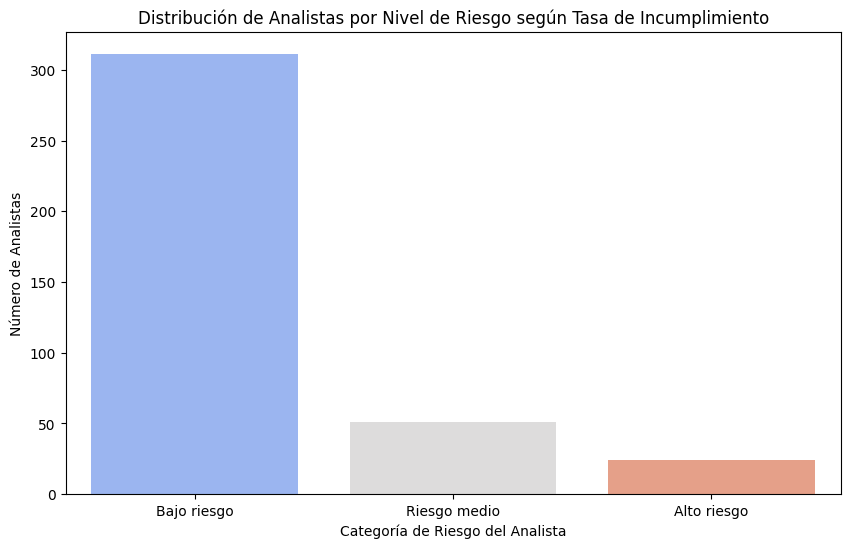

In [ ]:
# Visualización 

plt.figure(figsize=(10,6))
sns.countplot(data=df_tasa_incumplimiento, x='categoria_riesgo', palette='coolwarm')
plt.xlabel("Categoría de Riesgo del Analista")
plt.ylabel("Número de Analistas")
plt.title("Distribución de Analistas por Nivel de Riesgo según Tasa de Incumplimiento")
plt.show()


##### ¿El desempeño de los analistas sigue patrones específicos o es aleatorio?

In [52]:
#Aplicar una chi2

from scipy.stats import chi2_contingency

# Crear la tabla de contingencia (filas: analistas, columnas: estado de crédito)
tabla_contingencia = pd.crosstab(df['analista'], df['estado_categoria'])

# Mostrar la tabla
print(tabla_contingencia)


estado_categoria  bueno  indeterminado  malo
analista                                    
ACX                   9              0     0
ADR                   6              1     0
AIL                   0             11     0
AIZ                   3              0     0
AJI                   0              2     0
...                 ...            ...   ...
SON                  14              0     1
WBZ                   3              1     0
YMG                   0             11     0
YPN                  16              1     3
ZUL                   6              0     1

[386 rows x 3 columns]


In [53]:
# Aplicar la prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# Mostrar los resultados
print(f"Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")

# Evaluar la significancia estadística
if p < 0.05:
    print("Conclusión: Existen diferencias significativas en las tasas de incumplimiento entre los analistas.")
else:
    print("Conclusión: No hay evidencia estadística de que las tasas de incumplimiento varíen entre los analistas.")


Chi-cuadrado: 3047.36303536123
Valor p: 2.115539047786252e-267
Conclusión: Existen diferencias significativas en las tasas de incumplimiento entre los analistas.


#### Conclusiones

- La correlación entre "Analista" y "Riesgo" es baja, lo que sugiere que no hay una relación numérica fuerte.
- El hecho de que 15 (3,88%) de 386 analistas aprueben más créditos de alto riesgo puede indicar una tendencia real o que puede atribuirse a un simple error o aleatoriedad. Para entender mejor la causa, sería recomendable analizar la relación con otros factores como la ubicación geográfica y el tipo de crédito otorgado.
- La tabla de contingencia muestra qué analistas aprueban más créditos de alto riesgo.
- Las tasas de incumplimiento varían significativamente entre los analistas. Esto indica que algunos analistas están aprobando más créditos riesgosos que otros de una manera que no es aleatoria.
- El riesgo de los créditos no está distribuido equitativamente entre todos los analistas. Algunos analistas están asignando más créditos que terminan en "castigo" o "cobro judicial", mientras que otros tienen tasas de incumplimiento más bajas.